#                                                   Covid-19 Data Analysis Notebook

#### Importing  the Modules

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import plotly.express as px
from plotly.subplots import make_subplots


 #### Importing Covid19 Dataset

In [3]:
covid_df=pd.read_csv('C:\\Users\\SAMEER\\OneDrive\\Desktop\\xyz\\covid_19_india (1).csv')


#### Delete the useless Columns

In [4]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace = True ,axis=1)

In [5]:
covid_df.head(20)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1/30/2020,Kerala,0,0,1
1,1/31/2020,Kerala,0,0,1
2,2/1/2020,Kerala,0,0,2
3,2/2/2020,Kerala,0,0,3
4,2/3/2020,Kerala,0,0,3
5,2/4/2020,Kerala,0,0,3
6,2/5/2020,Kerala,0,0,3
7,2/6/2020,Kerala,0,0,3
8,2/7/2020,Kerala,0,0,3
9,2/8/2020,Kerala,0,0,3


In [12]:
import pandas as pd

covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%m/%d/%Y')


#### To Find Total Number of Active Cases

In [13]:
covid_df['active_cases']= covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'] )

In [14]:
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active_cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


#### Creating the Pivot Table using Pandas Library 

In [15]:
statewise=pd.pivot_table(covid_df,values=['Confirmed','Deaths','Cured'],index="State/UnionTerritory",aggfunc=max)
statewise

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_8636\3800616845.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statewise=pd.pivot_table(covid_df,values=['Confirmed','Deaths','Cured'],index="State/UnionTerritory",aggfunc=max)


,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


### To Find Recovery Rate

###### formula = the_total_number_of_curedcase % by total number of cases * 100

In [16]:
statewise['recovery_rate']=statewise['Cured']*100%statewise['Confirmed']
statewise

,Confirmed,Cured,Deaths,recovery_rate
State/UnionTerritory,,,,
Andaman and Nicobar Islands,7548,7412,129,1496
Andhra Pradesh,1985182,1952736,13564,725764
Arunachal Pradesh,50605,47821,248,25230
Assam,576149,559684,5420,81947
Bihar,725279,715352,9646,457858
Bihar****,715730,701234,9452,697590
Cases being reassigned to states,9265,0,0,0
Chandigarh,61992,61150,811,39784
Chhattisgarh,1003356,988189,13544,490012


### To Find Out the Total Number of Mortality Rate

In [17]:
statewise['mortality_rate']=statewise['Deaths']*100 % statewise['Confirmed']
statewise

,Confirmed,Cured,Deaths,recovery_rate,mortality_rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,1496,5352
Andhra Pradesh,1985182,1952736,13564,725764,1356400
Arunachal Pradesh,50605,47821,248,25230,24800
Assam,576149,559684,5420,81947,542000
Bihar,725279,715352,9646,457858,239321
Bihar****,715730,701234,9452,697590,229470
Cases being reassigned to states,9265,0,0,0,0
Chandigarh,61992,61150,811,39784,19108
Chhattisgarh,1003356,988189,13544,490012,351044


### Sorting the Values Based on the Confirmed Cases

In [18]:
statewise = statewise.sort_values(by='Confirmed', ascending=False)
statewise

,Confirmed,Cured,Deaths,recovery_rate,mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,5077168,693216
Maharashtra***,6229596,6000911,130753,2049884,616108
Kerala,3586693,3396184,18004,2469258,1800400
Karnataka,2921049,2861499,36848,2808147,763751
Karanataka,2885238,2821491,36197,2281014,734462
Tamil Nadu,2579130,2524400,34367,2264390,857570
Andhra Pradesh,1985182,1952736,13564,725764,1356400
Uttar Pradesh,1708812,1685492,22775,1085624,568688
West Bengal,1534999,1506532,18252,223298,290201


### Ploting the Pivot Table

In [19]:
statewise.style.background_gradient(cmap='gnuplot')

,Confirmed,Cured,Deaths,recovery_rate,mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,5077168,693216
Maharashtra***,6229596,6000911,130753,2049884,616108
Kerala,3586693,3396184,18004,2469258,1800400
Karnataka,2921049,2861499,36848,2808147,763751
Karanataka,2885238,2821491,36197,2281014,734462
Tamil Nadu,2579130,2524400,34367,2264390,857570
Andhra Pradesh,1985182,1952736,13564,725764,1356400
Uttar Pradesh,1708812,1685492,22775,1085624,568688
West Bengal,1534999,1506532,18252,223298,290201


### Top 10 States which has Most Active Cases in India

In [20]:
top_10_active_cases = covid_df.groupby(by='State/UnionTerritory').max()[['active_cases','Date']].sort_values(by=['active_cases'],ascending=False).reset_index()
top_10_active_cases

,State/UnionTerritory,active_cases,Date
0,Maharashtra,701614,2021-08-11
1,Karnataka,605515,2021-08-11
2,Kerala,445692,2021-08-11
3,Tamil Nadu,313048,2021-08-11
4,Uttar Pradesh,310783,2021-08-11
5,Rajasthan,212753,2021-08-11
6,Andhra Pradesh,211554,2021-08-11
7,Gujarat,148297,2021-08-11
8,West Bengal,132181,2021-08-11
9,Chhattisgarh,131245,2021-08-11


### Top 10 States with Most Active Cases in India 
####  Graphical Representation

Text(0, 0.5, 'top_10_active_cases')

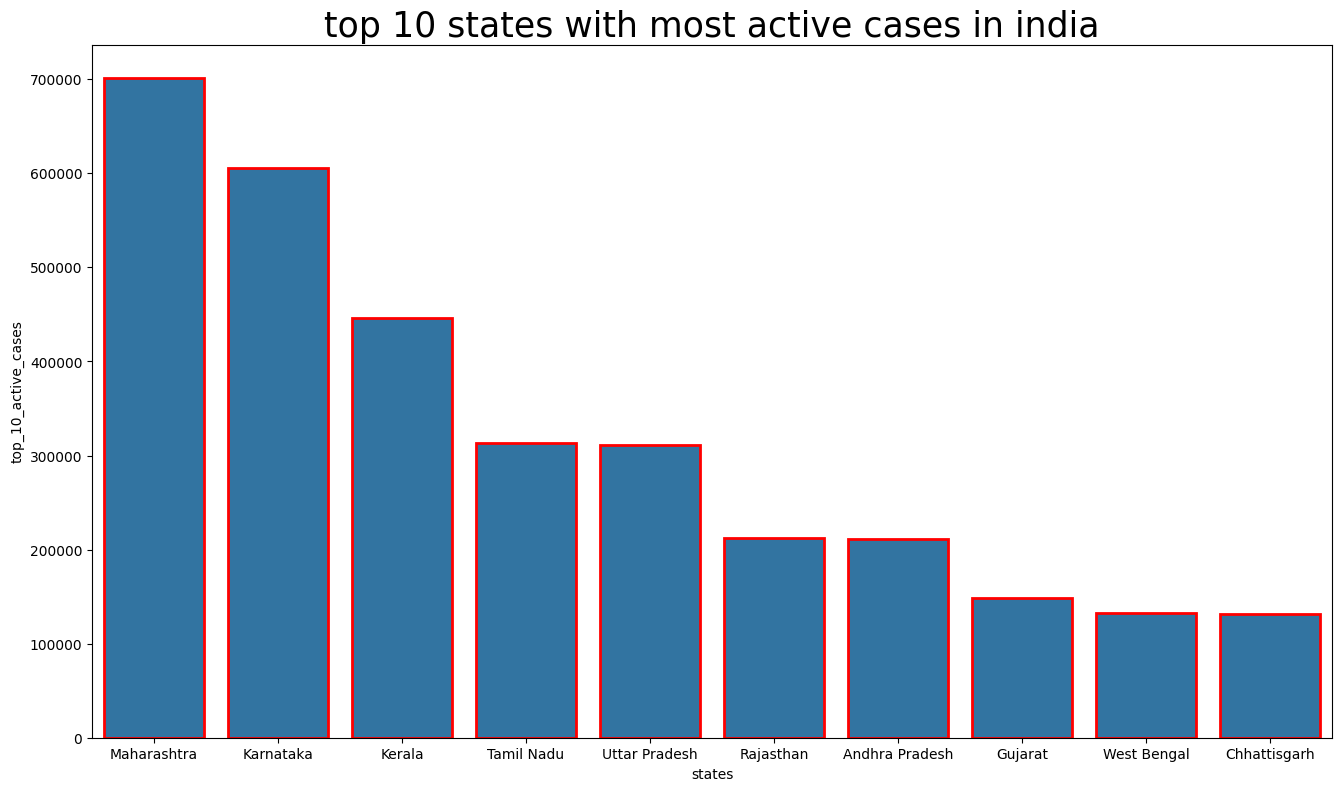

In [21]:
import seaborn as sns 
fig = plt.figure(figsize=(16,9))

plt.title('top 10 states with most active cases in india',size=25)

ax = sns.barplot (data = top_10_active_cases . iloc[:10] , y = 'active_cases' , x = 'State/UnionTerritory' , linewidth=2 ,edgecolor='r')

plt.xlabel('states')
plt.ylabel('top_10_active_cases')

### Top 10 States with Highest Deaths Recorded 
#### Graphical Representation 

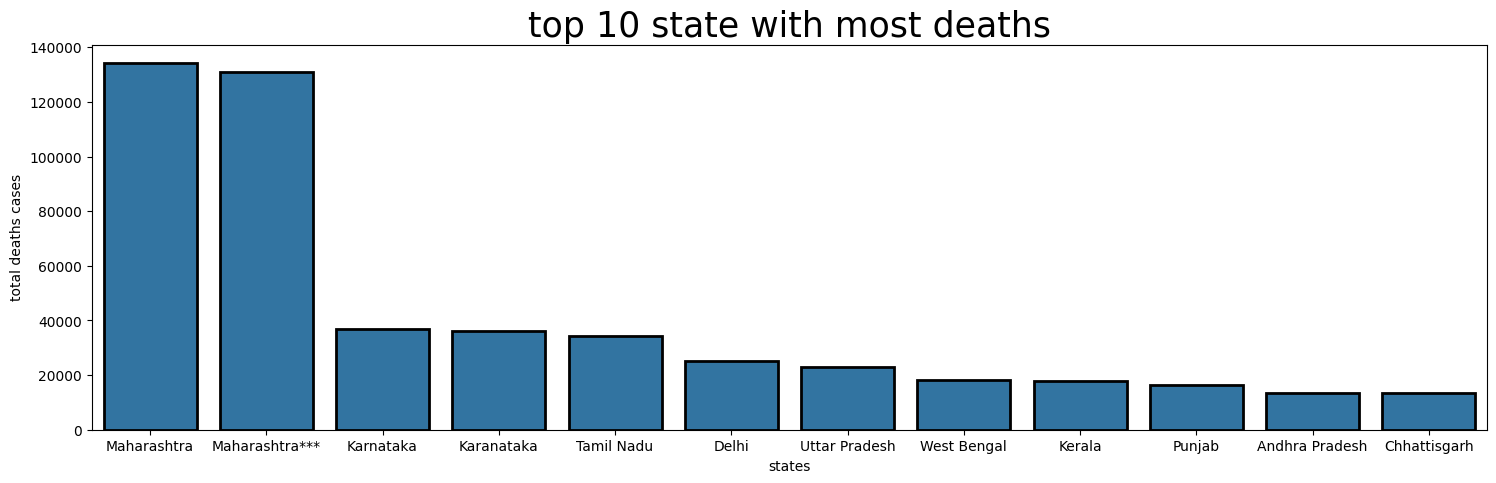

In [22]:
top_10_death = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'], ascending = False). reset_index()

fig = plt . figure (figsize = (18,5))

plt.title('top 10 state with most deaths' , size =25)

ax = sns.barplot(data = top_10_death.iloc[:12] , y = 'Deaths', x = 'State/UnionTerritory' , linewidth=2 , edgecolor = 'black')
plt.xlabel('states')
plt.ylabel('total deaths cases')
plt.show()

# Ploting the linear plot

### Growth trend

Text(0.5, 1.0, 'top 5 affected state in india')

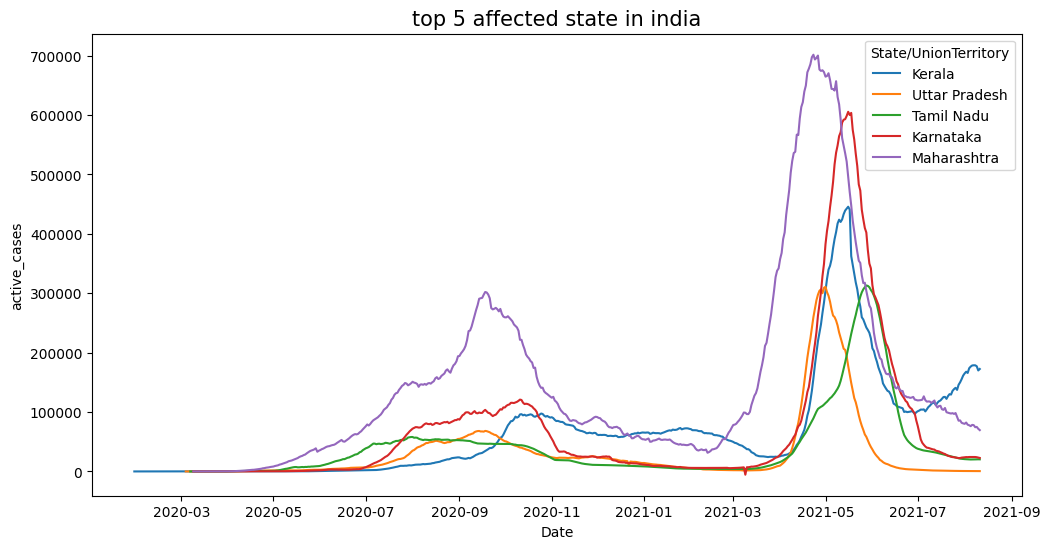

In [23]:
fig = plt.figure(figsize = (12,6))

ax = sns.lineplot (data = covid_df [covid_df['State/UnionTerritory'].isin (['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])] , x ='Date' , y = 'active_cases' , hue ='State/UnionTerritory')


ax.set_title ('top 5 affected state in india', size=15)

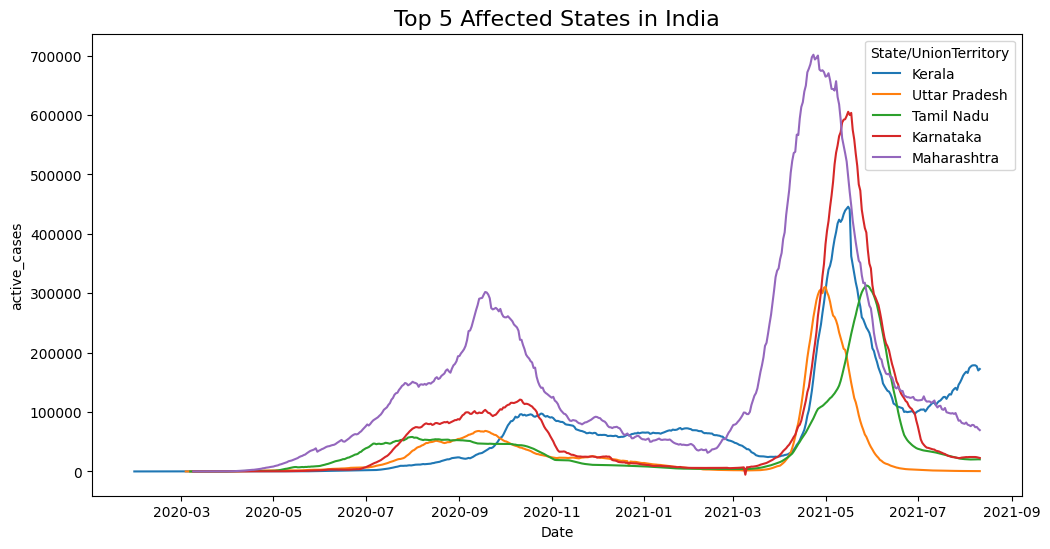

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame creation (replace with your actual DataFrame)
# data = {'Date': ['2023-01-01', '2023-01-02', ...], 'active_cases': [1000, 800, ...], 'State/UnionTerritory': ['Maharashtra', 'Karnataka', ...]}
# covid_df = pd.DataFrame(data)
# Ensure 'Date' is in datetime format
# covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

# Create the figure
fig = plt.figure(figsize=(12, 6))

# Create the line plot
ax = sns.lineplot(
    data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])],
    x='Date',
    y='active_cases',
    hue='State/UnionTerritory'
)

# Set the title of the plot
ax.set_title('Top 5 Affected States in India', size=16)

# Show the plot
plt.show()


 ## Importing Covid-19 Vaccinated dataset

In [24]:
vaccine_df=pd.read_csv('C:\\Users\SAMEER\\OneDrive\\Desktop\\covid_vaccine_statewise.csv' )
vaccine_df

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\SAMEER\AppData\Local\Temp\ipykernel_8636\3679127666.py:1: SyntaxWarning: invalid escape sequence '\S'
  vaccine_df=pd.read_csv('C:\\Users\SAMEER\\OneDrive\\Desktop\\covid_vaccine_statewise.csv' )


,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/8/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/8/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Renaming the column

In [21]:
vaccine_df.rename(columns = {'Updated On' : 'vaccine_Date'},inplace = True)

In [22]:
vaccine_df.head()

,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


### Checking for Missing Values in the Vaccine Data

In [23]:
vaccine_df.isnull().sum()

vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [24]:
vaccinated = vaccine_df.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'], axis = 1)

In [25]:
vaccinated

,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/8/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/8/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Installing plotly

In [26]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import plotly.express as px
from plotly.subplots import make_subplots

### Male and Female

In [34]:
male = vaccinated['Male (Doses Administered)']. sum()
female = vaccinated['Female (Doses Administered)']. sum()

px.pie(names=['Male','Female'], values=[male,female], title= 'Male and Female Vaccination')

#### removing the  row  where State = India

In [ ]:
vaccine =vaccine_df[vaccine_df.State !='India']
vaccine

### Rename column 'Total Individuals Vaccinated' to 'total'

In [49]:
vaccine.rename(columns={'Total Individuals Vaccinated': 'total'}, inplace=True)
vaccine

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_74988\485499234.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/8/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/8/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the Top 5 States with the Highest Total Vaccinations

In [51]:
max_vac = vaccine.groupby('State')['total'].sum().to_frame('total')
max_vac = max_vac.sort_values('total',ascending = False)[:5]
max_vac


,total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


### Creating a Bar Plot to 5 Vaccinated State in India

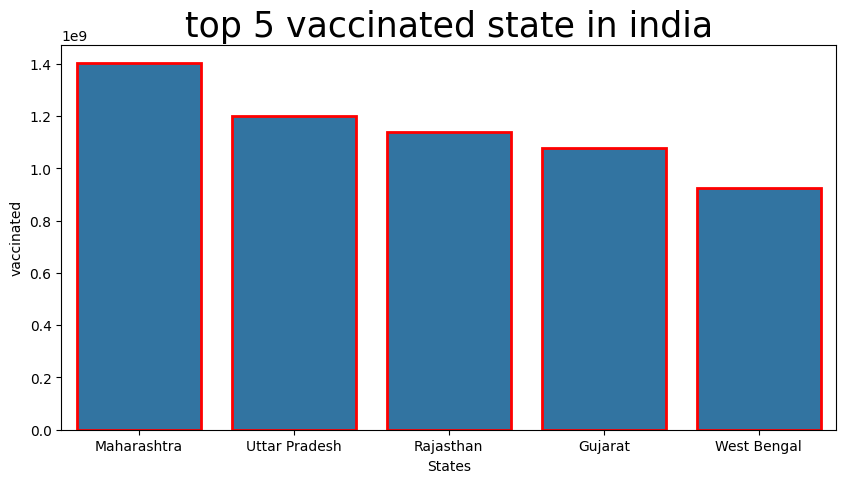

In [56]:
fig = plt.figure (figsize = (10,5))
plt.title('top 5 vaccinated state in india' , size = 25)
x = sns.barplot(data=max_vac.iloc[:10] , y = max_vac.total , x = max_vac.index , linewidth = 2, edgecolor='r')
plt.xlabel('States')
plt.ylabel('vaccinated')
plt.show()